In [2]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Load the network from a CSV file
csv_file_path = "data_random_graph.csv"  # Replace with your CSV file path
edge_df = pd.read_csv(csv_file_path,delimiter=" ")


# Create a graph from the CSV edge list
G = nx.from_pandas_edgelist(edge_df, 'source', 'target')
nx.set_node_attributes(G, "S", "state")  # Set all nodes as Susceptible

# Parameters for simulation
infection_prob = 0.3
recovery_prob = 0.1
threshold = 0.3  # 30% of nodes infected triggers misinformation recognition
initial_infected = [random.choice(list(G.nodes))]  # Start with node 1 infected

# Initialize infected nodes
for node in initial_infected:
    G.nodes[node]["state"] = "I"

# Prepare tracking lists
susceptible_counts, infected_counts, recovered_counts = [], [], []

# Simulation
for step in range(50):  # Run for 50 steps
    new_infected, new_recovered = [], []
    
    # Count current states
    infected_count = sum(1 for n in G.nodes if G.nodes[n]["state"] == "I")
    total_nodes = G.number_of_nodes()
    
    # Check if threshold is reached
    if infected_count / total_nodes >= threshold:
        # Start recovery process from the first infected node
        for node in initial_infected:
            if G.nodes[node]["state"] == "I":
                # Attempt to recover neighbors
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]["state"] == "S":
                        G.nodes[neighbor]["state"] = "R"
                        new_recovered.append(neighbor)

    # Regular infection and recovery process
    for node in G.nodes:
        if G.nodes[node]["state"] == "I":
            # Attempt to infect neighbors
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]["state"] == "S" and random.random() < infection_prob:
                    new_infected.append(neighbor)
            # Attempt recovery
            if random.random() < recovery_prob:
                new_recovered.append(node)

    # Update states
    for node in new_infected:
        G.nodes[node]["state"] = "I"
    for node in new_recovered:
        G.nodes[node]["state"] = "R"    
        
    # Track counts
    susceptible_counts.append(sum(1 for n in G.nodes if G.nodes[n]["state"] == "S"))
    infected_counts.append(sum(1 for n in G.nodes if G.nodes[n]["state"] == "I"))
    recovered_counts.append(sum(1 for n in G.nodes if G.nodes[n]["state"] == "R"))

# Plot results
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Node Count")
plt.legend()
plt.show()


KeyError: 'source'

In [20]:
# ... meglévő kód ...

# Check if threshold is reached
if infected_count / total_nodes >= threshold:
    # Start recovery process from the first infected node
    for node in initial_infected:
        if G.nodes[node]["state"] == "I":
            # Attempt to recover neighbors
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]["state"] == "S":
                    G.nodes[neighbor]["state"] = "R"
                    new_recovered.append(neighbor)

# Regular infection and recovery process
for node in G.nodes:
    if G.nodes[node]["state"] == "I":
        # Attempt to infect neighbors
        for neighbor in G.neighbors(node):
            if G.nodes[neighbor]["state"] == "S" and random.random() < infection_prob:
                new_infected.append(neighbor)
        # Attempt recovery
        if random.random() < recovery_prob:
            new_recovered.append(node)

# Update states
for node in new_infected:
    G.nodes[node]["state"] = "I"
for node in new_recovered:
    G.nodes[node]["state"] = "R"

# ... meglévő kód ...

In [11]:
# ... meglévő kód ...

# Check if threshold is reached
if infected_count / total_nodes >= threshold:
    # Convert infected nodes to recovered
    for node in G.nodes:
        if G.nodes[node]["state"] == "I":
            G.nodes[node]["state"] = "R"
        if G.nodes[node]["state"] == "R":
                # Attempt to recover neighbors
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]["state"] == "S":
                        G.nodes[node]["state"] = "R"
                        new_recovered.append(neighbor)
# Regular infection and recovery process
for node in G.nodes:
    if G.nodes[node]["state"] == "I":
        # Attempt to infect neighbors
        for neighbor in G.neighbors(node):
            if G.nodes[neighbor]["state"] == "S" and random.random() < infection_prob:
                new_infected.append(neighbor)
        # Attempt recovery
        #if random.random() < recovery_prob:
         #   new_recovered.append(node)
    
# Update states
for node in new_infected:
    G.nodes[node]["state"] = "I"
for node in new_recovered:
    G.nodes[node]["state"] = "R"

# ... meglévő kód ...

30


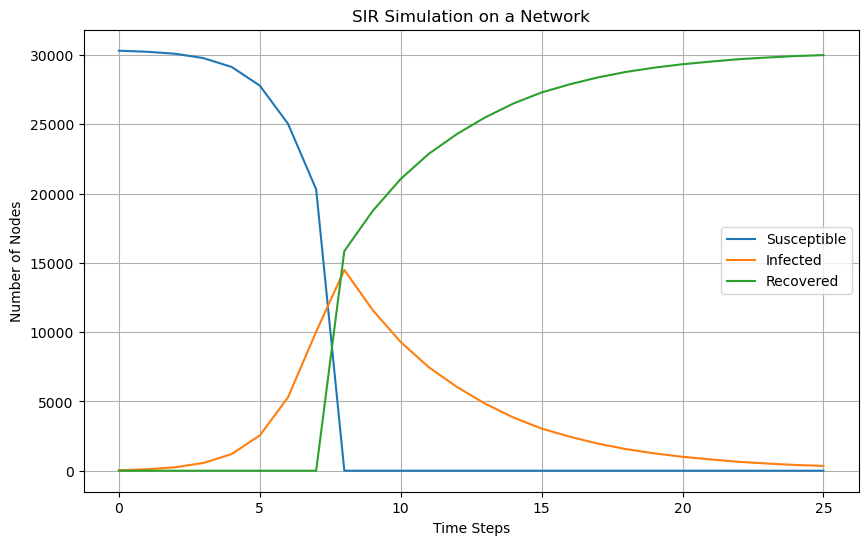

In [5]:
# Load the CSV file and create the graph
file_path = 'data\data_random_graph.csv'  # Update with the actual path to your file
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.2  # Recovery probability
initial_infected_fraction = 0.001  # Initial fraction of infected nodes
recovery_threshold = 0.3  # Threshold for recovery

# Initialize states
nodes = list(G.nodes)
n = len(nodes)
initial_infected = int(initial_infected_fraction * n)
infected_nodes = np.random.choice(nodes, initial_infected, replace=False)
node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
for node in infected_nodes:
    node_states[node] = 'I'
print(len(infected_nodes))

# Record initial state counts
susceptible_counts = [n - initial_infected]
infected_counts = [initial_infected]
recovered_counts = [0]

# Simulation loop
time_steps = 25# Adjust based on required duration
for t in range(time_steps):
    new_states = node_states.copy()
    for node in nodes:
        if node_states[node] == 'I':  # Infected node
            # Spread to neighbors
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' and np.random.rand() < beta:
                    new_states[neighbor] = 'I'
            # Recover
            if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                new_states[node] = 'R'
                recovery_threshold = 1
                for node in nodes:
                    if node_states[node] == 'S':
                        new_states[node] = 'R'
            if np.random.rand() < gamma and recovery_threshold == 1:
                new_states[node] = 'R'
    
    # Update states
    node_states = new_states
    susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
    infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
    recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
    
    # Break if no more infected
    if infected_counts[-1] == 0:
        break

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.title("SIR Simulation on a Network")
plt.legend()
plt.grid()
plt.show()

## Random case

0.460345359235276


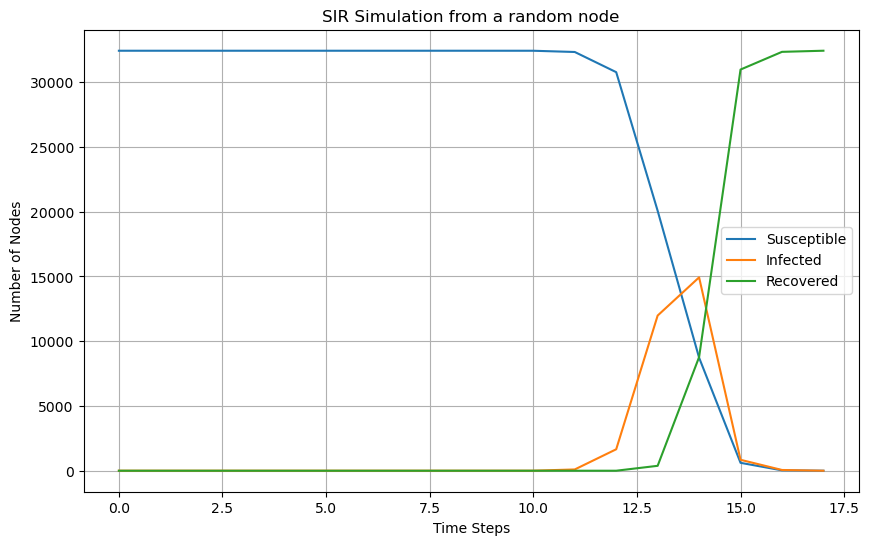

In [51]:
# Load the CSV file and create the graph
#file_path = 'data\\final_final_random_graph.csv'  # Update with the actual path to your file
file_path = 'data\data - fixed numbers.csv'
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23  # Recovery probability
#initial_infected_fraction = 0.001  # Initial fraction of infected nodes
recovery_threshold = 0.05  # Threshold for recovery

# Initialize states
nodes = list(G.nodes)
n = len(nodes)
initial_infected = 1
infected_nodes = np.random.choice(nodes, replace=False)
node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
#for node in infected_nodes:
node_states[infected_nodes] = 'I'

# Record initial state counts
susceptible_counts = [n - initial_infected]
infected_counts = [initial_infected]
recovered_counts = [0]

# Simulation loop
time_steps = 25# Adjust based on required duration
for t in range(time_steps):
    new_states = node_states.copy()
    for node in nodes:
        if node_states[node] == 'I':  # Infected node
            # Spread to neighbors
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' and np.random.rand() < beta:
                    new_states[neighbor] = 'I'
            # Recover
            if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                new_states[node] = 'R'
                continue
                
        if node_states[node] == 'R':        
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                    new_states[neighbor] = 'R'
                
            #if np.random.rand() < gamma and recovery_threshold == 1:
                #new_states[node] = 'R'
    
    # Update states
    node_states = new_states
    susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
    infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
    recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
    
    # Break if no more infected
    if infected_counts[-1] == 0:
        break
print(max(infected_counts)/n)
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.title("SIR Simulation from a random node")
plt.legend()
plt.grid()
plt.savefig("fig_case3_original.png")
plt.show()

## From highly connected node

0.18513721862473018


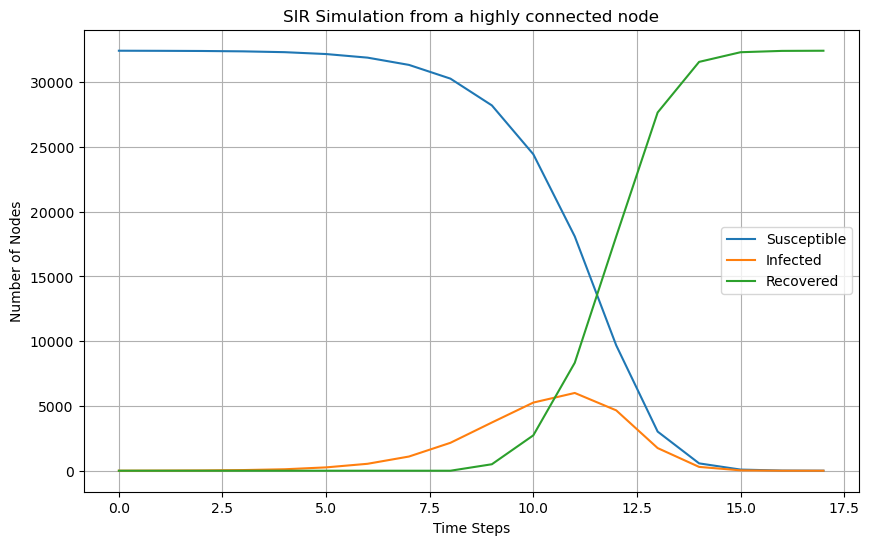

In [42]:
# Load the CSV file and create the graph
file_path = 'data\\final_final_random_graph.csv'  # Update with the actual path to your file
#file_path = 'data\data - fixed numbers.csv'
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23  # Recovery probability
#initial_infected_fraction = 0.001  # Initial fraction of infected nodes
recovery_threshold = 0.05  # Threshold for recovery

# Initialize states 
nodes = list(G.nodes)
n = len(nodes)
initial_infected = 1
#infected_nodes = np.random.choice(nodes, replace=False)
node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
#for node in infected_nodes:
#node_states[102] = 'I' #original network
node_states[8121] = 'I' #syntetic network
#print(infected_nodes)

# Record initial state counts
susceptible_counts = [n - initial_infected]
infected_counts = [initial_infected]
recovered_counts = [0]

# Simulation loop
time_steps = 25# Adjust based on required duration
for t in range(time_steps):
    new_states = node_states.copy()
    for node in nodes:
        if node_states[node] == 'I':  # Infected node
            # Spread to neighbors
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' and np.random.rand() < beta:
                    new_states[neighbor] = 'I'
            # Recover
            if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                new_states[node] = 'R'
                continue
                
        if node_states[node] == 'R':        
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                    new_states[neighbor] = 'R'
                
            #if np.random.rand() < gamma and recovery_threshold == 1:
                #new_states[node] = 'R'
    
    # Update states
    node_states = new_states
    susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
    infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
    recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
    
    # Break if no more infected
    if infected_counts[-1] == 0:
        break
print(max(infected_counts)/n)
# Plot results

plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.title("SIR Simulation from a highly connected node")
plt.legend()
plt.grid()
plt.savefig("fig_case1_syntetic.png")
plt.show()

## Losely connected node

0.5954054887449892


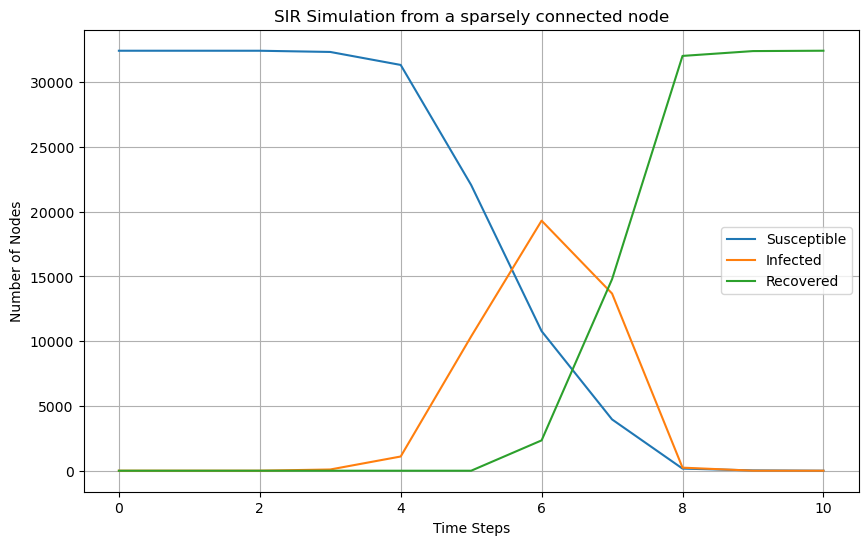

In [49]:
# Load the CSV file and create the graph
#file_path = 'data\\final_final_random_graph.csv'  # Update with the actual path to your file
file_path = 'data\data - fixed numbers.csv'
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23  # Recovery probability
initial_infected_fraction = 0.001  # Initial fraction of infected nodes
recovery_threshold = 0.05  # Threshold for recovery

# Initialize states
nodes = list(G.nodes)
n = len(nodes)
initial_infected = 1
#infected_nodes = np.random.choice(nodes, replace=False)
node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
#for node in infected_nodes:
node_states[19242] = 'I'  #original network
#node_states[7] = 'I' #syntetic network
#print(infected_nodes)

# Record initial state counts
susceptible_counts = [n - initial_infected]
infected_counts = [initial_infected]
recovered_counts = [0]

# Simulation loop
time_steps = 50# Adjust based on required duration
for t in range(time_steps):
    new_states = node_states.copy()
    for node in nodes:
        if node_states[node] == 'I':  # Infected node
            # Spread to neighbors
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' and np.random.rand() < beta:
                    new_states[neighbor] = 'I'
            # Recover
            if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                new_states[node] = 'R'
                continue
                
        if node_states[node] == 'R':        
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                    new_states[neighbor] = 'R'
                
            #if np.random.rand() < gamma and recovery_threshold == 1:
                #new_states[node] = 'R'
    
    # Update states
    node_states = new_states
    susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
    infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
    recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
    
    # Break if no more infected
    if infected_counts[-1] == 0:
        break
print(max(infected_counts)/n)
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.title("SIR Simulation from a sparsely connected node")
plt.legend()
plt.grid()
plt.savefig("fig_case2_original.png")
plt.show()